Change the kernel to __newautoriftenv__.

In [3]:
import rasterio as rio
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import os
import subprocess
import shutil
from scipy.interpolate import interp2d

In [4]:
# basepath = '/Volumes/SGlacier/surge_projects/OGSGlacier/2019_rd/Resampled/March_2019r/'
basepath = '/Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/'
os.listdir(basepath)

['PS_20190327_1060.tif',
 '20190321_200747_1003_3B_AnalyticMS_SR_clip_5m_mv.tif',
 '20190327_201338_0f34_3B_AnalyticMS_SR_clip_5m_mv.tif',
 '20190326_200536_103d_3B_AnalyticMS_SR_clip_5m_mv.tif',
 '20190324_201206_1014_3B_AnalyticMS_SR_clip_5m_mv.tif',
 '20190326_201300_1011_3B_AnalyticMS_SR_clip_5m_mv.tif',
 '20190325_200639_0f35_3B_AnalyticMS_SR_clip_5m_mv.tif',
 '20190307_183151_0f33_3B_AnalyticMS_SR_clip_5m_mv.tif',
 '20190329_200518_1009_3B_AnalyticMS_SR_clip_5m_mv.tif',
 'PS_20190325_1021.tif',
 'PS_20190321_1003.tif',
 '20190304_201426_72_105f_3B_AnalyticMS_SR_clip_5m_mv.tif',
 '20190324_201207_1014_3B_AnalyticMS_SR_clip_5m_mv.tif',
 '20190330_201055_0f4e_3B_AnalyticMS_SR_clip_5m_mv.tif',
 'PS_20190325_0f35.tif',
 '20190307_183150_0f33_3B_AnalyticMS_SR_clip_5m_mv.tif',
 'PS_20190307_0f33.tif',
 '20190327_202140_79_1060_3B_AnalyticMS_SR_clip_5m_mv.tif',
 '20190325_200517_1021_3B_AnalyticMS_SR_clip_5m_mv.tif',
 '20190326_201301_1011_3B_AnalyticMS_SR_clip_5m_mv.tif',
 '20190325_200

# Coregister and stitch all Planet tiles for each image date

In [13]:
# grab unique dates
filelist = os.listdir(basepath); filelist.sort()
unique_dates = []; IDs = []
for file in filelist:
    if file.startswith('2') and file.endswith('tif'):
        date = file.split('_')[0] # grab the date
        sID = file.split('_')[-7] # grab the satellite ID (4 digit code)
        unique_dates.append(date); IDs.append(sID) # append to list
sorted_dates = list(set(list(zip(unique_dates, IDs)))) # set of the zipped date and ID
sorted_dates.sort() # sorted
print(sorted_dates)

[('20190304', '105f'), ('20190307', '0f33'), ('20190308', '0e0f'), ('20190308', '0f3f'), ('20190308', '104a'), ('20190311', '0e2f'), ('20190321', '1001'), ('20190321', '1003'), ('20190321', '1020'), ('20190324', '1014'), ('20190324', '104a'), ('20190324', '104b'), ('20190324', '1059'), ('20190325', '0f35'), ('20190325', '100d'), ('20190325', '1021'), ('20190325', '1062'), ('20190326', '1011'), ('20190326', '103d'), ('20190327', '0f34'), ('20190327', '1060'), ('20190329', '1009'), ('20190329', '101f'), ('20190329', '1021'), ('20190330', '0f4e'), ('20190330', '1039')]


In [11]:
# Grab the first Planet tile for reference CRS and Transform
files = []
for file in filelist:
    if file.endswith('.tif'):
        files.append(file)
reftile = rio.open(basepath+files[0])
print(reftile.crs)
reftile.transform

EPSG:32607


Affine(4.979215074031483, 0.0, 552405.7509554505,
       0.0, -4.97921507403153, 6675752.108247815)

TILES FOR 20190304 105f
['20190304_201426_72_105f_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190304_201428_77_105f_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190304_201430_83_105f_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190304_201426_72_105f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.5170467581949132
20190304_201428_77_105f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.2752648123460929
Current tile is larger.
Mean difference in values from the larger tile in overlap area: -0.24858177245110272
Smaller coregistered: 0.09917309022690993
Larger: 0.2752648123460929


20190304_201430_83_105f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.2989969957584455
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: -0.044189078952336105
Smaller coregistered: 0.19295266294145091


/var/folders/mr/7f69f7y50zj85n420pyvh8cr0000gq/T/ipykernel_71003/2534528832.py:75: RuntimeWarning: Mean of empty slice
  print('Larger:',np.nanmean(larger_tile))


Larger: nan




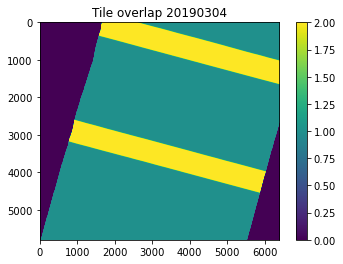

Overlapping tiles were coregistered.


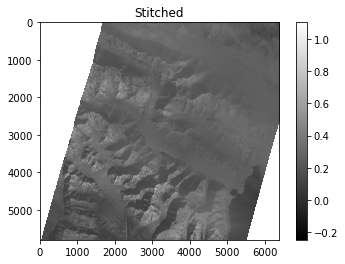

TILES FOR 20190307 0f33
['20190307_183148_0f33_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190307_183149_0f33_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190307_183150_0f33_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190307_183151_0f33_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190307_183152_0f33_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190307_183148_0f33_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.09124769338031394
20190307_183149_0f33_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.15569216389867238
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.027386075867311076
Smaller coregistered: 0.10101881109736972
Larger: 0.15569216389867238


20190307_183150_0f33_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.16729166312781515
Current tile is larger.
Mean difference in values from the larger tile in overlap area: -0.005211272554024094
Smaller coregistered: 0.0
Larger: 0.16723812065220722


20190307_183151_0f33_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.10937550117334405


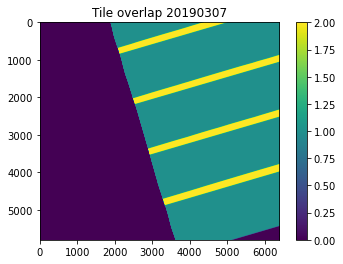

Overlapping tiles were coregistered.


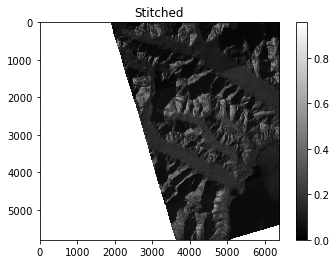

TILES FOR 20190308 0e0f
['20190308_200409_0e0f_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190308_200410_0e0f_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190308_200411_0e0f_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190308_200412_0e0f_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190308_200409_0e0f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.09603601917257687
20190308_200410_0e0f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.39653605401448977
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.2386175817580091
Smaller coregistered: 0.29738529840715394
Larger: 0.39653605401448977


20190308_200411_0e0f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.46776949599024736
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: -0.07957839815473614
Smaller coregistered: 0.3487028279086831
Larger: nan


20190308_200412_0e0f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.48611872976428966
Previous tile is larger.
Mean difference in values from the

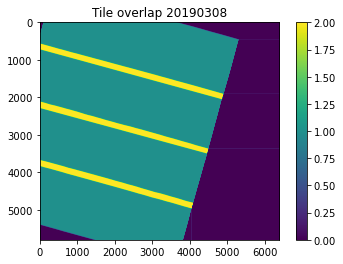

Overlapping tiles were coregistered.


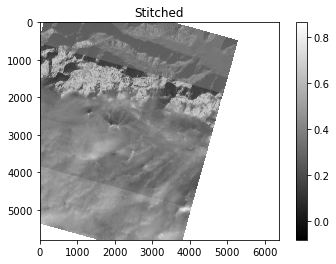

TILES FOR 20190308 0f3f
['20190308_200750_0f3f_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190308_200751_0f3f_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190308_200752_0f3f_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190308_200753_0f3f_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190308_200750_0f3f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.26689199276971143
20190308_200751_0f3f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.4096639741511637
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.16626790721053433
Smaller coregistered: 0.38028668661289466
Larger: 0.4096639741511637


20190308_200752_0f3f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.45089249198873804
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.10349300355091882
Smaller coregistered: 0.0
Larger: 0.4471134074314269


20190308_200753_0f3f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.41833983252415063
Previous tile is larger.
Mean difference in values from the la

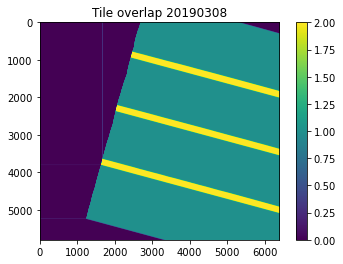

Overlapping tiles were coregistered.


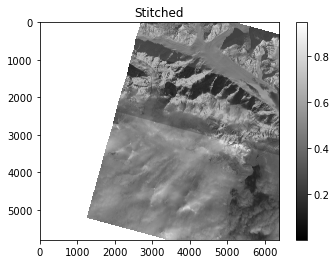

TILES FOR 20190308 104a
['20190308_182955_104a_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190308_182956_104a_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190308_182957_104a_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190308_182958_104a_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190308_182955_104a_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.2412668091075906
20190308_182956_104a_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.08067370911858746
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: 0.1639120038531067
Smaller coregistered: 0.21518937460670967
Larger: 0.2412668091075906


20190308_182957_104a_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.11161271003362397
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: 0.005267416385929833
Smaller coregistered: 0.10535582274348232
Larger: nan


20190308_182958_104a_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.10798568711275401
Previous tile is larger.
Mean difference in values from the

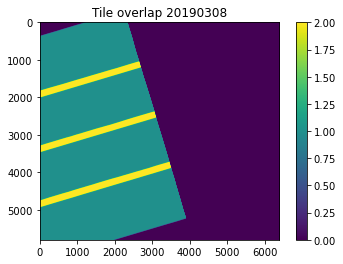

Overlapping tiles were coregistered.


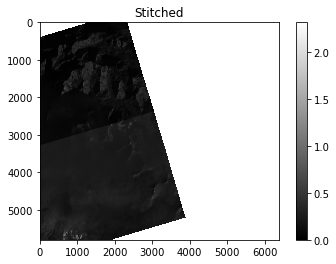

TILES FOR 20190311 0e2f
['20190311_200243_0e2f_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190311_200243_0e2f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.4399872703509114


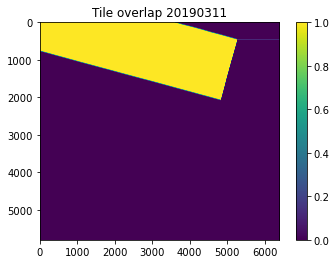

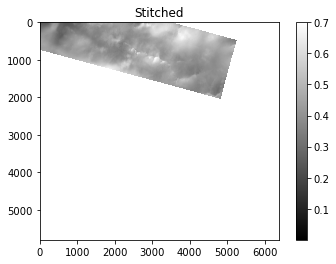

TILES FOR 20190321 1001
['20190321_200924_1001_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190321_200924_1001_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.42059700710304115


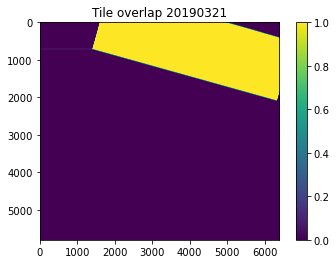

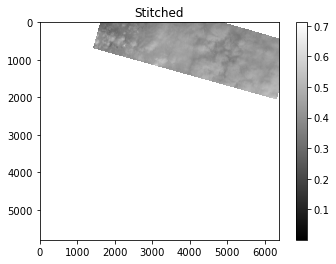

TILES FOR 20190321 1003
['20190321_200747_1003_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190321_200748_1003_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190321_200747_1003_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.534740654029818
20190321_200748_1003_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.5287754445091629
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: -0.008310713432093065
Smaller coregistered: 0.38672745400428166
Larger: 0.534740654029818




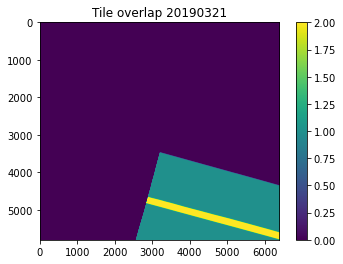

Overlapping tiles were coregistered.


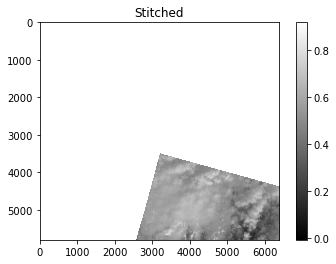

TILES FOR 20190321 1020
['20190321_182950_1020_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190321_182951_1020_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190321_182952_1020_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190321_182953_1020_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190321_182954_1020_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190321_182950_1020_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.2935810943398151
20190321_182951_1020_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.3761341713630802
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.00016853848541765567
Smaller coregistered: 0.20979336667419998
Larger: 0.3761341713630802


20190321_182952_1020_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.09297753925017159
Current tile is larger.
Mean difference in values from the larger tile in overlap area: -0.33934535181093617
Smaller coregistered: 0.0
Larger: 0.0944204114532186


20190321_182953_1020_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.11431573062361956
Pre

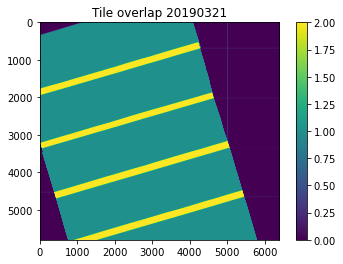

Overlapping tiles were coregistered.


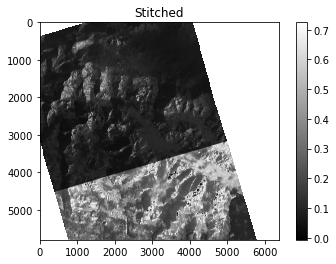

TILES FOR 20190324 1014
['20190324_201205_1014_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190324_201206_1014_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190324_201207_1014_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190324_201205_1014_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.4777821234123742
20190324_201206_1014_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.4315531260400409
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.10093679115904616
Smaller coregistered: 0.5288387475941917
Larger: 0.4315531260400409


20190324_201207_1014_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.5139521704844218
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: -0.0519707491684404
Smaller coregistered: 0.38168329684736113
Larger: nan




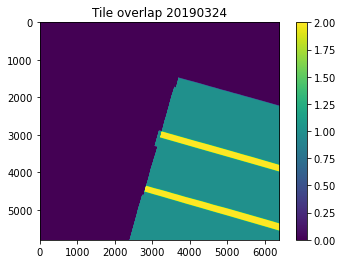

Overlapping tiles were coregistered.


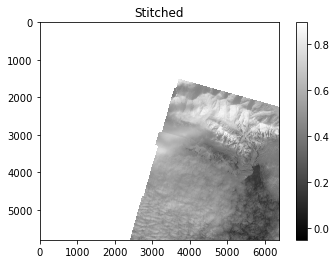

TILES FOR 20190324 104a
['20190324_183023_104a_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190324_183024_104a_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190324_183025_104a_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190324_183027_104a_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190324_183023_104a_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.41999747698844386
20190324_183024_104a_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.5144486060163113
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.05017391437499944
Smaller coregistered: 0.375368034660303
Larger: 0.5144486060163113


20190324_183025_104a_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.3476071971543904
20190324_183027_104a_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.2344576031536483


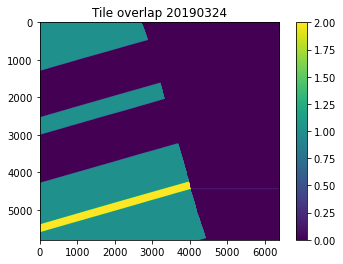

Overlapping tiles were coregistered.


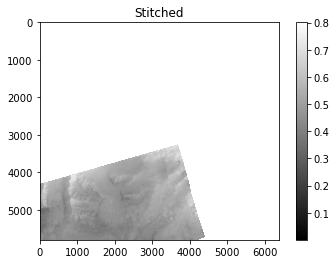

TILES FOR 20190324 104b
['20190324_182653_104b_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190324_182654_104b_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190324_182655_104b_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190324_182656_104b_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190324_182653_104b_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.2716718621759939
20190324_182654_104b_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.5561117277894597
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.11567648609571708
Smaller coregistered: 0.324601379173376
Larger: 0.5561117277894597


20190324_182655_104b_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.5720321984366669
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.02005203072469936
Smaller coregistered: 0.0
Larger: 0.5743102302874419


20190324_182656_104b_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.265645924274933
Previous tile is larger.
Mean difference in values from the larger t

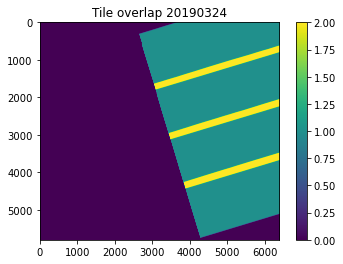

Overlapping tiles were coregistered.


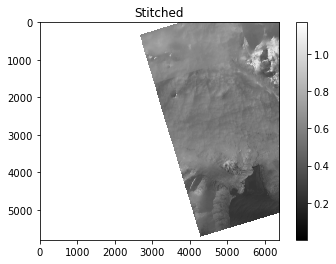

TILES FOR 20190324 1059
['20190324_201659_78_1059_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190324_201701_83_1059_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190324_201659_78_1059_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.42209074990938283
20190324_201701_83_1059_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.5758823220644987
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.1867467849341322
Smaller coregistered: 0.4712865162467954
Larger: 0.5758823220644987




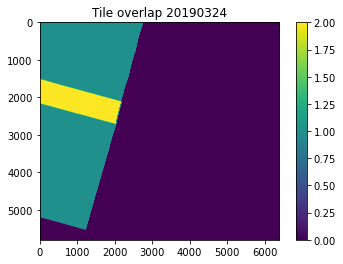

Overlapping tiles were coregistered.


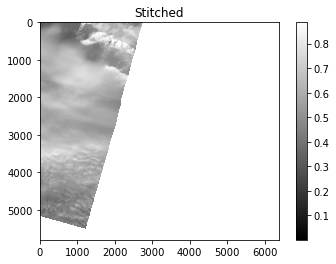

TILES FOR 20190325 0f35
['20190325_200637_0f35_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190325_200638_0f35_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190325_200639_0f35_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190325_200640_0f35_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190325_200637_0f35_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.37475479853986243
20190325_200638_0f35_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.37476722680428803
Current tile is larger.
Mean difference in values from the larger tile in overlap area: -0.02612718104077821
Smaller coregistered: 0.2992168909357879
Larger: 0.37476722680428803


20190325_200639_0f35_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.3354644615113753
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: -0.012542487733449464
Smaller coregistered: 0.2825934652383546
Larger: nan


20190325_200640_0f35_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.32935837534502643
Previous tile is larger.
Mean difference in values from th

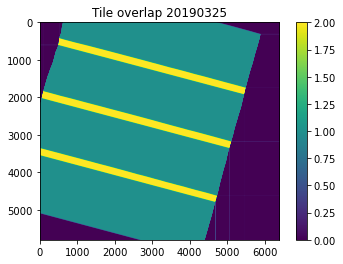

Overlapping tiles were coregistered.


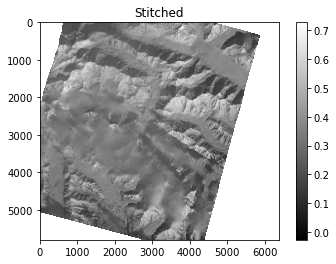

TILES FOR 20190325 100d
['20190325_182501_100d_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190325_182502_100d_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190325_182501_100d_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.22469528426229152
20190325_182502_100d_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.473064644969707
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.032566675645837456
Smaller coregistered: 0.20568759651787863
Larger: 0.473064644969707




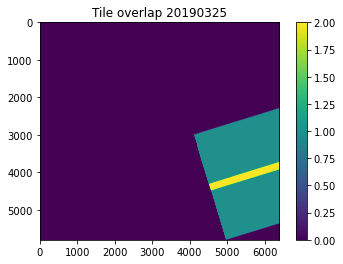

Overlapping tiles were coregistered.


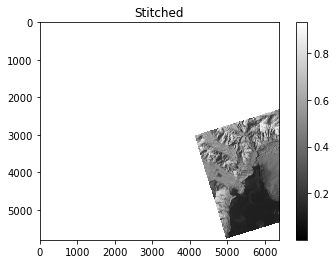

TILES FOR 20190325 1021
['20190325_200517_1021_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190325_200518_1021_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190325_200517_1021_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.4295106050230036
20190325_200518_1021_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.2678283917264483
Current tile is larger.
Mean difference in values from the larger tile in overlap area: -0.025633158516258078
Smaller coregistered: 0.36416646309231815
Larger: 0.2678283917264483




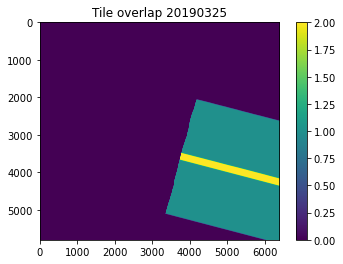

Overlapping tiles were coregistered.


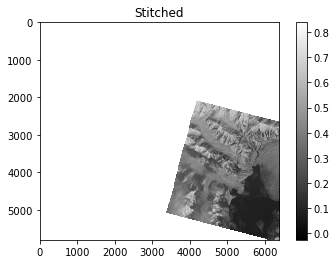

TILES FOR 20190325 1062
['20190325_194909_46_1062_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190325_194911_55_1062_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190325_194913_64_1062_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190325_194909_46_1062_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.2695123648098046
20190325_194911_55_1062_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.4496465796251237
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: -0.11843719978893477
Smaller coregistered: 0.2707438164809588
Larger: 0.2695123648098046


20190325_194913_64_1062_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.3831756347904079
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: -0.0025628071940411528
Smaller coregistered: 0.03598290090481503
Larger: nan




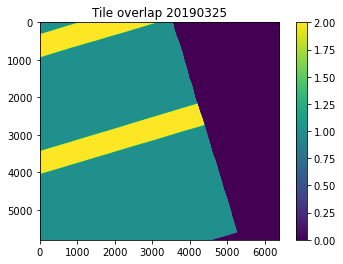

Overlapping tiles were coregistered.


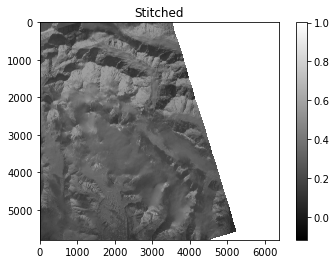

TILES FOR 20190326 1011
['20190326_201259_1011_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190326_201300_1011_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190326_201301_1011_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190326_201259_1011_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.3107357052794538
20190326_201300_1011_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.47824714610642255
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.12785236982775017
Smaller coregistered: 0.34192780189302485
Larger: 0.47824714610642255


20190326_201301_1011_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.41107531717568796
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: 5.178729094479813e-06
Smaller coregistered: 0.36041273452907036
Larger: nan




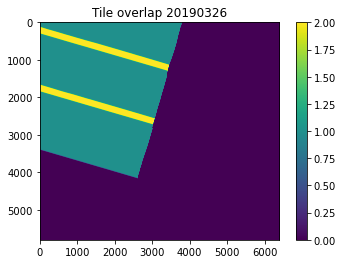

Overlapping tiles were coregistered.


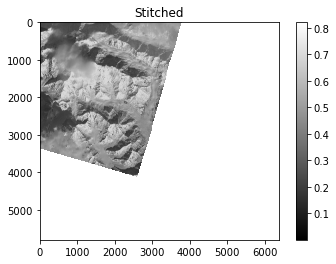

TILES FOR 20190326 103d
['20190326_200535_103d_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190326_200536_103d_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190326_200535_103d_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.44189720946766403
20190326_200536_103d_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.21244907562314544
Current tile is larger.
Mean difference in values from the larger tile in overlap area: -0.07618259794337837
Smaller coregistered: 0.3360753944935601
Larger: 0.21244907562314544




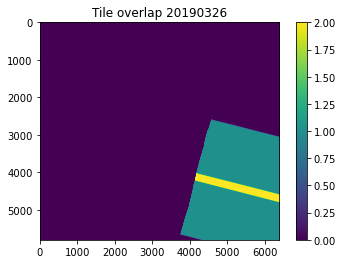

Overlapping tiles were coregistered.


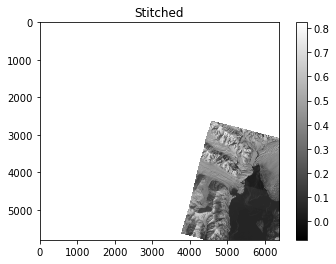

TILES FOR 20190327 0f34
['20190327_201335_0f34_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190327_201336_0f34_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190327_201337_0f34_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190327_201338_0f34_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190327_201335_0f34_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.2581637747378559
20190327_201336_0f34_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.22604699406917197
Current tile is larger.
Mean difference in values from the larger tile in overlap area: -0.02849011377947257
Smaller coregistered: 0.20536788559410168
Larger: 0.22604699406917197


20190327_201337_0f34_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.26306205227868196
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: -0.07866197350361359
Smaller coregistered: 0.1634538362276997
Larger: nan


20190327_201338_0f34_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.2759255227681523
Previous tile is larger.
Mean difference in values from the

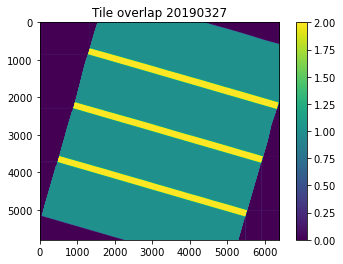

Overlapping tiles were coregistered.


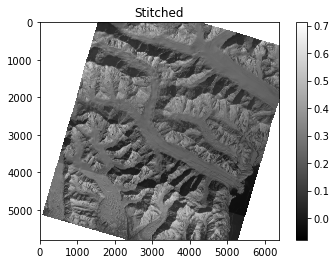

TILES FOR 20190327 1060
['20190327_202140_79_1060_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190327_202140_79_1060_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.28275743326405656


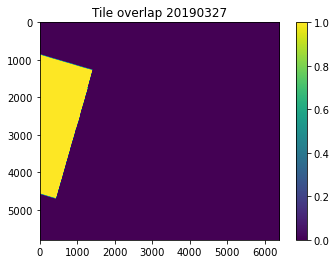

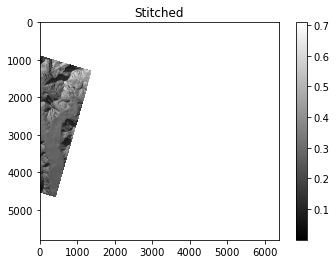

TILES FOR 20190329 1009
['20190329_200518_1009_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190329_200518_1009_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.3202194161244536


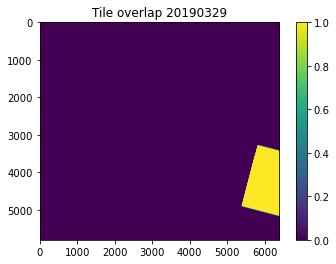

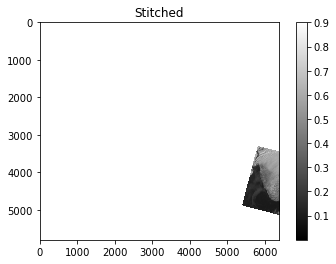

TILES FOR 20190329 101f
['20190329_201201_101f_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190329_201202_101f_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190329_201203_101f_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190329_201204_101f_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190329_201201_101f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.292405121630926
20190329_201202_101f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.30245774873795944
Current tile is larger.
Mean difference in values from the larger tile in overlap area: -0.010530745727060116
Smaller coregistered: 0.2441876364136841
Larger: 0.30245774873795944


20190329_201203_101f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.3769727590430707
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: -0.08818595331185558
Smaller coregistered: 0.2580783466425761
Larger: nan


20190329_201204_101f_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.3628604649043425
Previous tile is larger.
Mean difference in values from the l

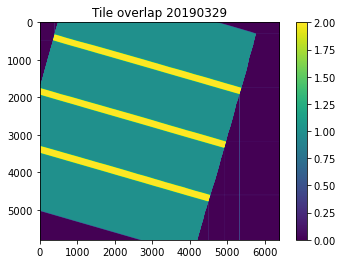

Overlapping tiles were coregistered.


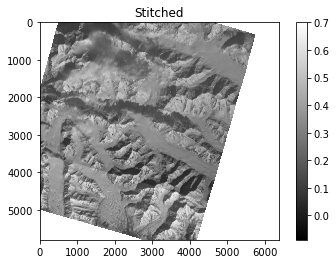

TILES FOR 20190329 1021
['20190329_200820_1021_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190329_200821_1021_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190329_200820_1021_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.30180354176881147
20190329_200821_1021_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.3763609869199104
Previous tile is larger.
Mean difference in values from the larger tile in overlap area: -0.10525939162937083
Smaller coregistered: 0.2310551470673843
Larger: 0.30180354176881147




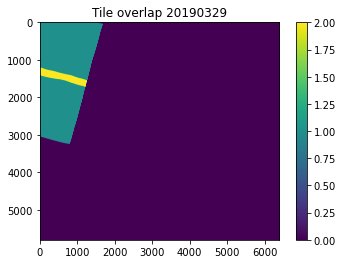

Overlapping tiles were coregistered.


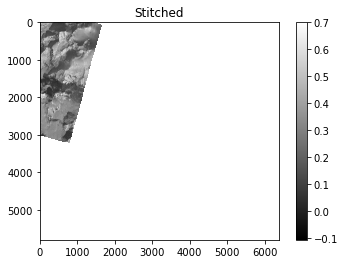

TILES FOR 20190330 0f4e
['20190330_201055_0f4e_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190330_201056_0f4e_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190330_201055_0f4e_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.2939786599276817
20190330_201056_0f4e_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.36612370266222044
Current tile is larger.
Mean difference in values from the larger tile in overlap area: -0.01588478392150061
Smaller coregistered: 0.226908164973018
Larger: 0.36612370266222044




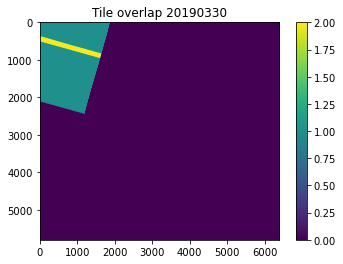

Overlapping tiles were coregistered.


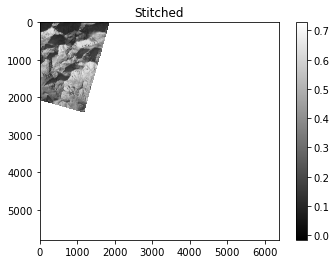

TILES FOR 20190330 1039
['20190330_200635_1039_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190330_200636_1039_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190330_200637_1039_3B_AnalyticMS_SR_clip_5m_mv.tif', '20190330_200638_1039_3B_AnalyticMS_SR_clip_5m_mv.tif']
20190330_200635_1039_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.36772357154170193
20190330_200636_1039_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.35876336480709337
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.0033667965382005154
Smaller coregistered: 0.3278389882479111
Larger: 0.35876336480709337


20190330_200637_1039_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.3127959312833088
Current tile is larger.
Mean difference in values from the larger tile in overlap area: 0.014012681939537492
Smaller coregistered: 0.0
Larger: 0.30854267839464333


20190330_200638_1039_3B_AnalyticMS_SR_clip_5m_mv.tif saved. Mean:  0.31966710044097946
Previous tile is larger.
Mean difference in values from th

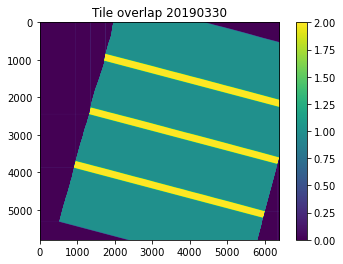

Overlapping tiles were coregistered.


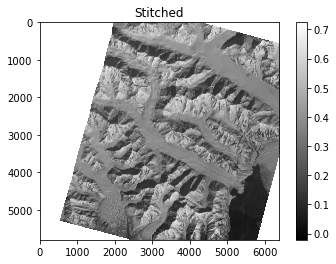

In [15]:
for date, ID in sorted_dates:  
    print('TILES FOR', date, ID)
    # Grab the Planet tiles corresponding to each unique date
    tiles = []
    for file in filelist:
        if file.startswith(date) and file.endswith('.tif') and file.split('_')[-7] == ID:
            tiles.append(file)
    tiles.sort() # sort tilenames alphanumeric order
    print(tiles)
    
    # initialize empty arrays
    sr_originals = []; sr_coregistered = []; sr_binary = []
    overlap_total = np.zeros(reftile.shape); total_coverage = np.zeros(reftile.shape).astype(bool)
    t = 0 # tile count
    for tile in tiles:
        reader = rio.open(basepath+tile); sr = reader.read(1) 
        sr_orig = sr.copy(); sr_originals.append(sr_orig) # store the original tile
        sr[sr>0] = 1 ; sr[np.isnan(sr)] = 0 # make tile binary
        sr_data = sr_orig # use the original tile as the data

        # use binary mask to calculate overlap area
        overlap_total = overlap_total+sr # add to calculate overlap
        tilesize = np.count_nonzero(sr) # grab the current tile size (pixels)
        overlap_area = np.count_nonzero(overlap_total[overlap_total >= 2]) # total overlap area
            
        print(tile, 'saved. Mean: ',np.nanmean(sr_data)); # Plot!
#             plt.imshow(sr_orig,cmap='gray'); plt.title('Tile'); plt.colorbar(); plt.show()
    
        if t >= 1: # start comparisons with the second tile
                
#             fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5)) # Plot!
#             im1 = ax1.imshow(sr_data_prev,cmap='gray'); ax1.set_title('Previous tile'); fig.colorbar(im1, ax=ax1)
#             im2 = ax2.imshow(sr_data,cmap='gray'); ax2.set_title('Tile'); fig.colorbar(im2, ax=ax2); plt.show()
            
            # Determine each pair of tiles' overlap
            if overlap_area > prev_overlap: # increase in overlapping area indicates we have 2 overlapping tiles!!!
                overlap2 = sr_prev+sr # calculate the overlap between just these two
                overlap_band = ma.masked_less(overlap2, 2) # mask out non-overlapping area
                overlap_band_mask = ma.getmaskarray(overlap_band) # grab the mask for the overlapping area
                
                # grab the current coverage of the 2 tiles
                combined_coverage = ma.masked_greater_equal(overlap2, 1) # get rid of anything less than 1
                coverage_mask = ma.getmaskarray(combined_coverage) # grab the mask
            
                # identify which tile is larger
                if tilesize > prev_tilesize:
                    print('Current tile is larger.')
                    larger_tile = sr_data; smaller_tile = sr_data_prev # assign the tiles
                elif tilesize < prev_tilesize:
                    print('Previous tile is larger.')
                    larger_tile = sr_data_prev; smaller_tile = sr_data # assign the tiles
                else: # equal sizes
                    print('Tiles are the same size.')
                    larger_tile = sr_data; smaller_tile = sr_data_prev # use current tile to coregister
                    
                # grab pixel values from overlapping area from both tiles
                overlap_values_l = ma.masked_where(overlap_band_mask, larger_tile)
                overlap_values_larger = ~overlap_values_l.mask*overlap_values_l.data
                overlap_values_s = ma.masked_where(overlap_band_mask, smaller_tile)
                overlap_values_smaller = ~overlap_values_s.mask*overlap_values_s.data
                mean_diff = np.nanmean(np.subtract(overlap_values_larger,overlap_values_smaller)) # mean diff
                print('Mean difference in values from the larger tile in overlap area:',mean_diff)

                # coregister the smaller tile's values to the larger reference tile's overlap values
                smaller_tile_coreg = smaller_tile + mean_diff # add the mean difference to all values
                smaller_tile_coreg = ma.masked_where(~overlap_band_mask, smaller_tile_coreg) 
                
                # with overlap removed:
                larger_tile = ma.masked_where(total_coverage,larger_tile)
                masked_larger_tile = ~larger_tile.mask*larger_tile.data
                smaller_tile_coreg = ma.masked_where(total_coverage, smaller_tile_coreg)
                masked_smaller_tile_coreg = ~smaller_tile_coreg.mask*smaller_tile_coreg.data
                
                print('Smaller coregistered:',np.nanmean(masked_smaller_tile_coreg))
                print('Larger:',np.nanmean(larger_tile))
                print(); print();
                  
                # over-write into co-registered files
                sr_coregistered.append(masked_smaller_tile_coreg)
                sr_coregistered.append(masked_larger_tile)
                total_coverage = ma.mask_or(total_coverage, coverage_mask) # add to coverage to total coverage
            
        # Store tile info for the next round of comparison
        prev_overlap = overlap_area # amount of pixels overlapping
        prev_tile = tile
        prev_tilesize = tilesize # previous tile size (pixels w/ data)
        sr_data_prev = sr_data
        sr_prev = sr
        t += 1 # increment tile count
        
    # Evaluate overlap between between all scenes
    fig = plt.figure(); im = plt.imshow(overlap_total); fig.colorbar(im); plt.title('Tile overlap '+date+' '+ID); 
    plt.show()
    total_overlap_area = np.count_nonzero(overlap_total[overlap_total >= 2]) # overlapping areas will have >= 2
    stitched = np.zeros(sr.shape) # intialize stitched array
    if total_overlap_area > 0: # if there was overlap
        print('Overlapping tiles were coregistered.')
        stitched = np.nansum(sr_coregistered,0) # sum all coregistered (along slices)
    else: # if no overlap between any of the tiles
        stitched = np.nansum(sr_originals,0) # sum all (along slces)
    stitched[stitched == 0]=np.NaN # fill in with NaNs
    fig = plt.figure(); im = plt.imshow(stitched, cmap='gray'); plt.title('Stitched'); fig.colorbar(im); plt.show()
    
    # Export stitched image
    outfilename = 'PS_'+date+'_'+ID+'.tif'
    with rio.open(basepath+outfilename,'w',
                      driver='GTiff',
                      height=stitched.shape[0], # new shape
                      width=stitched.shape[1], # new shape
                      dtype=stitched.dtype, # data type
                      count=1,
                      crs=reftile.crs, # the EPSG from the original DEM
                      transform=reftile.transform) as dst:
            dst.write(stitched, 1)
            
#     break
    del sr_coregistered; del sr_originals; del total_coverage; del overlap_total; del sr_binary;
    

# Crop images to Turner Glacier's box

In [5]:
boxpath = '/Users/jukesliu/Documents/TURNER/DATA/shapefiles_gis/BoxTurner_UTM_07.shp' # path to shapefile

# clip all stitched files
for file in os.listdir(basepath):
    if file.startswith('PS') and file.endswith('.tif') and 'clipped' not in file:
        date = file[3:11]; print(date)
        
        # if the clipped version doesn't already exist
        if not file[:-4]+'_clipped.tif' in os.listdir(basepath): 
#             print(file)
            # Crop file
            crop_cmd = 'gdalwarp -cutline '+boxpath+' -crop_to_cutline '
            crop_cmd += basepath+file+' '+basepath+file[:-4]+'_clipped.tif'
            print(crop_cmd); print()

            subprocess.run(crop_cmd,shell=True,check=True); print()


20190327
gdalwarp -cutline /Users/jukesliu/Documents/TURNER/DATA/shapefiles_gis/BoxTurner_UTM_07.shp -crop_to_cutline /Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/PS_20190327_1060.tif /Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/PS_20190327_1060_clipped.tif

Creating output file that is 8357P x 8315L.
Processing /Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/PS_20190327_1060.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.

20190325
gdalwarp -cutline /Users/jukesliu/Documents/TURNER/DATA/shapefiles_gis/BoxTurner_UTM_07.shp -crop_to_cutline /Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/PS_20190325_1021.tif /Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/PS_20190325_1021_clipped.tif

Creating output file that is 8357P x 8315L.
Processing /Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/PS_20190325_1021.

Processing /Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/PS_20190327_0f34.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.

20190329
gdalwarp -cutline /Users/jukesliu/Documents/TURNER/DATA/shapefiles_gis/BoxTurner_UTM_07.shp -crop_to_cutline /Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/PS_20190329_101f.tif /Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/PS_20190329_101f_clipped.tif

Creating output file that is 8357P x 8315L.
Processing /Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/PS_20190329_101f.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.

20190308
gdalwarp -cutline /Users/jukesliu/Documents/TURNER/DATA/shapefiles_gis/BoxTurner_UTM_07.shp -crop_to_cutline /Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/PS_20190308_104a.tif /Users/jukesliu/Documents/TURNER/DATA/IMAGERY/Planet_test/Planet_test_all/